# Group 54 Final Project
## A Note
This notebook is structured such that it, sequentially, contains the work of all members in sections. One of the requirements of this notebook is that all group members give a conclusion regarding their work done. Each group member has written a conclusion contained within this notebook, it can be found at the end of the work section of each group member. Following the work/metric and conclusion of each individual member is the combined metric and final, holistic determination of best city.

## Goal
Our goal was to combine metrics relating to crime data, walkability, and primary care facilities, to determine the best city around the Pittsburgh region to raise a family in, based on safety.

## Crime Rates, Harry Rittenhouse:


![Alt Text](https://media.giphy.com/media/RYjnzPS8u0jAs/giphy.gif)



I am analyzing broad spectrum crime statistics listed in the **City of Pittsburgh Plotter Data**, this is a list of data that has tracked and recorded all reported incidents in and around Pittsburgh since 2016.

The Pittsburgh Police Department uses a hierarchical system to rank the "seriousness" of crimes listed in the plotter data. I will be looking specifically at overall frequency of offenses committed per neighborhood.




In [67]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

df1 = pd.read_csv('incident_data.csv')
df1.head(5)

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,2802309,16000001.0,10,2016-01-01T00:00:00,"400 Block North Shore DR Pittsburgh, PA 15212",Y,North Shore,1,HARRASSMENT/THREAT/ATTEMPT/PHY,2702 Aggravated Assault. / 2709(a) Harassment....,2205.0,1.0,6.0,-80.012337,40.446263
1,2803174,16004547.0,11,2016-01-01T00:01:00,"5400 Block Carnegie ST Pittsburgh, PA 15201",N,Upper Lawrenceville,2,THEFT BY DECEPTION,3922 Theft by Deception.,1011.0,7.0,2.0,-79.950295,40.482290
2,2801809,16000367.0,4,2016-01-01T00:10:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,2707.1 Discharge of a Firearm into Occupied St...,2609.0,1.0,1.0,-80.000966,40.478651
3,2802315,16000035.0,10,2016-01-01T00:15:00,"300 Block Wood ST Pittsburgh, PA 15222",Y,Golden Triangle/Civic Arena,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(3) Harassment No Legitimate Purpose,201.0,6.0,6.0,-80.001251,40.438918
4,2802312,16000024.0,4,2016-01-01T00:16:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY,2705 Recklessy Endangering Another Person. / 3...,2609.0,1.0,1.0,-80.000966,40.478651


The dataset sample above showcases its format where the exact time, address, neighborhood, and offense committed are listed. I am honing in specifically on crime location and crime frequency.

### Unique Neighborhoods:

As shown below, the PPD Blotter Data lists 96 unique neighborhoods in and around Pittsburgh, along with the number of reported crimes per in descending order.

In [68]:
crimestats = pd.DataFrame(df1['INCIDENTNEIGHBORHOOD'].value_counts())

df1.sort_values('INCIDENTNEIGHBORHOOD')
crimestats.head(98)

,INCIDENTNEIGHBORHOOD
South Side Flats,16889
Central Business District,16161
Carrick,10457
Bloomfield,7854
Shadyside,7654
...,...
Ridgemont,274
Troy Hill-Herrs Island,252
Outside County,211
Mt. Oliver Neighborhood,117


Within this data, I decided to rule out any neighborhoods with more than 600 reported incidents regardless of type. This leaves 14 potential safest neighborhoods, not including 'Outside County' and 'Outside State'.

,INCIDENTNEIGHBORHOOD
Oakwood,565
Regent Square,515
Hays,502
Arlington Heights,488
Summer Hill,465
Mount Oliver,453
Swisshelm Park,394
East Carnegie,380
New Homestead,309
Outside State,303


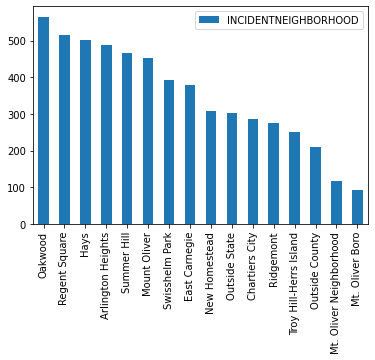

In [69]:
#crimestats = crimestats.drop('Outside County')
#crimestats = crimestats.drop('Outside State')
crimestats.iloc[82:98].plot.bar()

crimestats.iloc[82:98].head(16)

Next, I am going to compare the populations of the 14 neighborhoods listed above with that of their respective crime rates to deviate an objective "winner" of safest neighborhood per these metrics. 

### Populations...

Below is a 2020 Census CSV also from the WPRDC, listing every neighborhood's population. This is immensly helpful as we can now combine crime stats and population to come to a conclusion on safest neighborhood based solely on these two metrics/dataframes.

In [70]:
df_2 = pd.read_csv('population.csv')



df_2.head(89)



,Neighborhood,2010_Total_Population,2010_OneRace_Population,2010_White_Alone_Population,2010_Black_Alone_Population,2010_American_Indian_and_Alaska_Native_alone_population,2010_Asian_Alone_Population,2010_Native_Hawaiian_and_Other_Pacific_Islander_alone_Population,2010_Any_other_single_race_alone_Popualtion,2010_Population_two_or_more_races,...,Change_2010_to_2020_Total_Population,Change_2010_to_2020_OneRace_Population,Change_2010_to_2020_White_Alone_Population,Change_2010_to_2020_Black_Alone_Population,Change_2010_to_2020_American_Indian_and_Alaska_Native_alone_population,Change_2010_to_2020_Asian_Alone_Population,Change_2010_to_2020_Native_Hawaiian_and_Other_Pacific_Islander_alone_Population,Change_2010_to_2020_Any_other_single_race_alone_Popualtion,Change_2010_to_2020_Population_two_or_more_races,Change_2010_to_2020_Hispanic_or_Latino_Population
0,Allegheny Center,933,896,381,453,4,56,1,1,37,...,486,441,302,-63,4,179,0,19,45,23
1,Allegheny West,462,448,354,84,1,7,0,2,14,...,78,45,72,-52,0,9,1,15,33,28
2,Allentown,2500,2384,1485,878,9,1,0,11,116,...,-195,-258,-213,-93,-6,18,6,30,63,23
3,Arlington - Arlington Heights (Combined),2113,2042,1452,576,9,3,0,2,71,...,-73,-153,-246,44,-4,9,0,44,80,39
4,Banksville,4144,4053,3651,169,2,211,0,20,91,...,-17,-197,-460,25,5,174,2,57,180,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Upper Lawrenceville,2669,2590,1754,751,10,37,1,37,79,...,-275,-324,264,-597,-5,37,-1,-22,49,-17
85,West End,254,235,135,95,0,2,0,3,19,...,-49,-55,-17,-45,1,4,2,0,6,10
86,West Oakland,2604,2558,1373,1003,7,169,0,6,46,...,-70,-103,159,-395,-1,28,2,104,33,51
87,Westwood,3066,2980,2535,250,3,174,1,17,86,...,266,167,-339,28,0,418,1,59,99,78


In order to derive the crime rate per person, total population must be divided by total crime incidents. When this is completed we get: 

In [71]:
df_2 = df_2.iloc[[3, 57, 64, 36, 79, 52, 80, 25, 53, 19, 65, 82]]


df_2 = df_2[["Neighborhood", "2020_Total_Population"]]

crime_totals = ['565', '515', '502', '488', '465', '453', '394', '380', '309','287', '274', '396']

df_2['Crime_totals'] = crime_totals


df_2['Crime_per_person'] = [565/2040, 515/1025, 502/971, 488/321, 465/998, 453/443, 394/1339, 380/491, 309/917, 287/492 , 274/390, 459/2654]

df_2.head(14)

,Neighborhood,2020_Total_Population,Crime_totals,Crime_per_person
3,Arlington - Arlington Heights (Combined),2040,565,0.276961
57,Oakwood,1025,515,0.502439
64,Regent Square,971,502,0.516993
36,Hays,321,488,1.520249
79,Summer Hill,998,465,0.465932
52,Mt. Oliver,443,453,1.022573
80,Swisshelm Park,1339,394,0.294249
25,East Carnegie,491,380,0.773931
53,New Homestead,917,309,0.336968
19,Chartiers City,492,287,0.583333


In [7]:
#df2.plot(x='Total_Population_2020', y='Crime_totals')

## The Conclusion

### Troy Hill Neighborhood!:

With a crime index of .17 per person based on these metrics, the Troy Hill neighborhood is the winner. While having a much higher population than many of the other "safe" neighborhoods, Troy Hill manages to still maintain a strikingly low crime rate per person.




![Alt Text](https://media.giphy.com/media/j0BL9eIktNTmKc0QRd/giphy.gif)

#### (Troy Hill of the Los Angeles Rams)

<br>

## Walkability: Ibrahim Miloua

Using the Sidewalk to Street "Walkability" Ratio dataset found on WPRDC's website, I found it more convient or benefital to a family streets were more walkable, and a neighborhood that had greater walkibility was a better place to raise a family. This data set gave set lengths of streets and sidewalks corresponding to those streets. A ratio of close or at 1 meant that the streets were the same length as the sidewalks,thus best suited for raising a family. 

Side Note: As stated by the dataset Walkibity accounted for this ratio didnt include trails or stairs as this dataset was dealing mostly with sidewalks.
Website: https://data.wprdc.org/dataset/sidewalk-to-street-walkability-ratio

In [72]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

# this is a 30 day Blotter Data of crimes in pittsburgh
# 
df2 = pd.read_csv("walk.csv")
df2.head(5)

,GEOID,NAMELSAD,SidewalkStepLFt,StreetLFt,Ratio
0,420030103001,Block Group 1,13392.83310,30315.86390,0.441776
1,420030103002,Block Group 2,31944.47597,20586.79493,1.551697
2,420030103003,Block Group 3,18655.20798,12122.70024,1.538866
3,420030103004,Block Group 4,14456.19616,11567.62831,1.249711
4,420030201001,Block Group 1,43952.94811,24426.52459,1.799394


This is what the dataset looks like. We are given lengths of side walks and street lengths, as well as the ratio of the two.

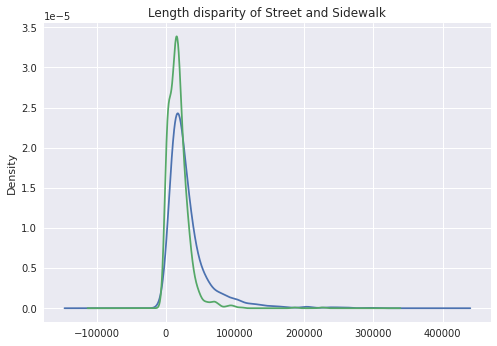

In [74]:
df2["StreetLFt"].plot.density()
df2["SidewalkStepLFt"].plot.density(title = "Length disparity of Street and Sidewalk",)
plt.style.use("seaborn")

As the dataset didn't give an exact location. This density graph allows us to visualize the ratio of steets to sidewalk lengths, showing that blue line as sidewalk length and green as street length. 
What can we pull from this data? We can see that most of the time that street length is greater than sidewalk length.

0.890990754986363

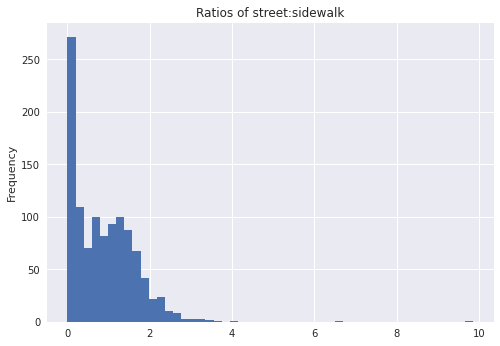

In [75]:
df2["Ratio"].plot(kind= "hist",bins=50,title="Ratios of street:sidewalk",)
plt.style.use("seaborn")
df2["Ratio"].mean()

This is a histogram of the ratios between Sidewalk & Street Length. We see that most approximately 270 of the counts are close to if not 0 so alot of streets have no sidewalks. On the bright side we also see a lot of counts of data clumps center at around the 1 "Which is great!" This tells us that a lot of entrys have as much walkwalk length as road length and we can tell thats true from calculating the mean of the ratios which is found to be equal to 0.891. This is quite ideal since on average a street is 89% walkable.

In [76]:
#find the largest ratios and their corresponding GEOIDS and sort them into a dictonary
sorted_df = df2.sort_values(by=["Ratio"], ascending=False)
geoList = []
ratioList = []
geo_counter = 0
ratio_counter = 0
for x in sorted_df["GEOID"]:
    if geo_counter<5:
        geoList.append(x)
    geo_counter+=1
    
for y in sorted_df["Ratio"]:
    if ratio_counter<5:
        ratioList.append(y)
    ratio_counter+=1
    
dict1 = dict()
for x in range(len(geoList)):
    dict1[geoList[x]]=ratioList[x]
    
print(dict1)
sorted_df.head()

{420034773002: 9.866192729, 420030509001: 6.644907924, 420039822001: 4.045072582, 420031401003: 3.615286259, 420031517006: 3.447670294}


,GEOID,NAMELSAD,SidewalkStepLFt,StreetLFt,Ratio
696,420034773002,Block Group 2,2438.601153,247.167395,9.866193
29,420030509001,Block Group 1,34060.434850,5125.794855,6.644908
1099,420039822001,Block Group 1,51352.285840,12695.022100,4.045073
123,420031401003,Block Group 3,23168.947540,6408.606643,3.615286
161,420031517006,Block Group 6,18191.335080,5276.413790,3.447670


To find the general location with GEOIDs we need the FIPS Code which is given as the first 5 digits of the GEOID. With the FIPS code we can find the gzip code which approximately gives us the location of the region we want to find. I found a dataset that included zipcodes and the fips conversion, and since the first 5 digits of the top neighborhood's with the highest ratios were the same. That meant we found our neigborhood.

In [77]:
FIPS = 42003

## Conclusion

In conclusion, using https://www.kaggle.com/datasets/tsnowak/us-geographic-codes which showed FIPS code to approximate zip codes, we were given many zip codes, including 15272,15274,15211 which all centered around Downtown Pittsburgh and its neighboring neighborhoods such as downtown pittsburgh, oakland and MT. Washington.

<br>

## Owen Capell: Analysis of Primary Care Facility Data

### Definition

As per the description of the dataset, a primary care facility is defined to be a location for which an individual can recieve primary medical care (care that is not classified as being in need of specialty analysis). These facilities are often hosptials or general primary care facilities (such as an Urgent Care or a Primary Care Physician)

### First Goal: Quantity of Primary Care Facilities in Each Definable Neighborhood

Given the relative abundance of primary care facilities, it is most practical to group them by ZIP-Code areas. Unfortunatley, this data set only contains ZIP-Code data, not the cities that those ZIP-Codes correspond to. Here the attempted solution is to bring in a new CSV that corresponds ZIP-Codes in Pennsylvania, create a hash table (dictionary in python) of these ZIP-Codes to Cities, so that the ZIP data in the primary care facility can be set to a city in the Greater Pittsburgh Area. This allows us to generate a Pandas DataFrame with the city name as the index, and with population, the quantity of primary care facilities, and the population-to-facility ratio as the rows.

In [50]:
plt.rcdefaults()

In [51]:
zip_data = pd.read_csv("zip_pop.csv")

In [52]:
#new hash table/dictionary to keep track of cities of zip codes
zip_to_city = {}

#pivot data so that columns are zip
zip_to_city = zip_data.set_index('zip').T.to_dict()

In [53]:
#load primary care data
primary_c_data = pd.read_csv("data-primary-care-access-facilities.csv")

#sort by ZIP so we can count how many primary care facilities per city
primary_by_zip = primary_c_data.groupby("PRACTICE_ZIP").count()

In [54]:
# dictionaries of the 3 columns, population, facility count, and population to facility ratio
primary_zip_dict = {}
pop_dict = {}
fac_dict = {}
density_dict = {}

# iterate through each zip code
# make dictionaries for city and population, city and # of facilities, city and pop-fac ratio

# create new dataframe with cities and # of facilities

for index, row in primary_by_zip.iterrows():
    # get city name and population of zip code
    city = zip_to_city[index]['city']
    population = int(zip_to_city[index]['population'])
    
    
    #get number of facilities in 
    facilities = int(row['GROUP_NAME'])
    
    if city=='Pittsburgh':
        city = 'Downtown Pittsburgh'
    
    if city in pop_dict:
        pop_dict[city] += population
        fac_dict[city] += facilities
    else:
        pop_dict[city] = population
        fac_dict[city] = facilities
        
    density_dict[city] = int(pop_dict[city] / fac_dict[city])

# create dictionary of dictionaries to use to create pandas df
primary_zip_dict = {
    'Population': pop_dict,
    'PCF': fac_dict,
    'Ratio': density_dict
}

# creating new pandas dataframe with the cities and pc facility quantity and po
city_data = pd.DataFrame(primary_zip_dict)
city_data.index.names = ['City']

### Second Goal: Visualize Primary Care Facilities by City

With a new Pandas DataFrame containing the number of primary care facilities by city, the new goal will be to create some visualizations. It should be noted that 'PCF' is short for 'Primary Care Facilities.'

In [55]:
city_data.tail()

,Population,PCF,Ratio
City,,,
Turtle Creek,6982,3,2327
Monroeville,27541,30,918
Verona,16693,3,5564
Wilmerding,2423,1,2423
Downtown Pittsburgh,667081,373,1788


Text(0.5, 0, 'Primary Care Facility Count')

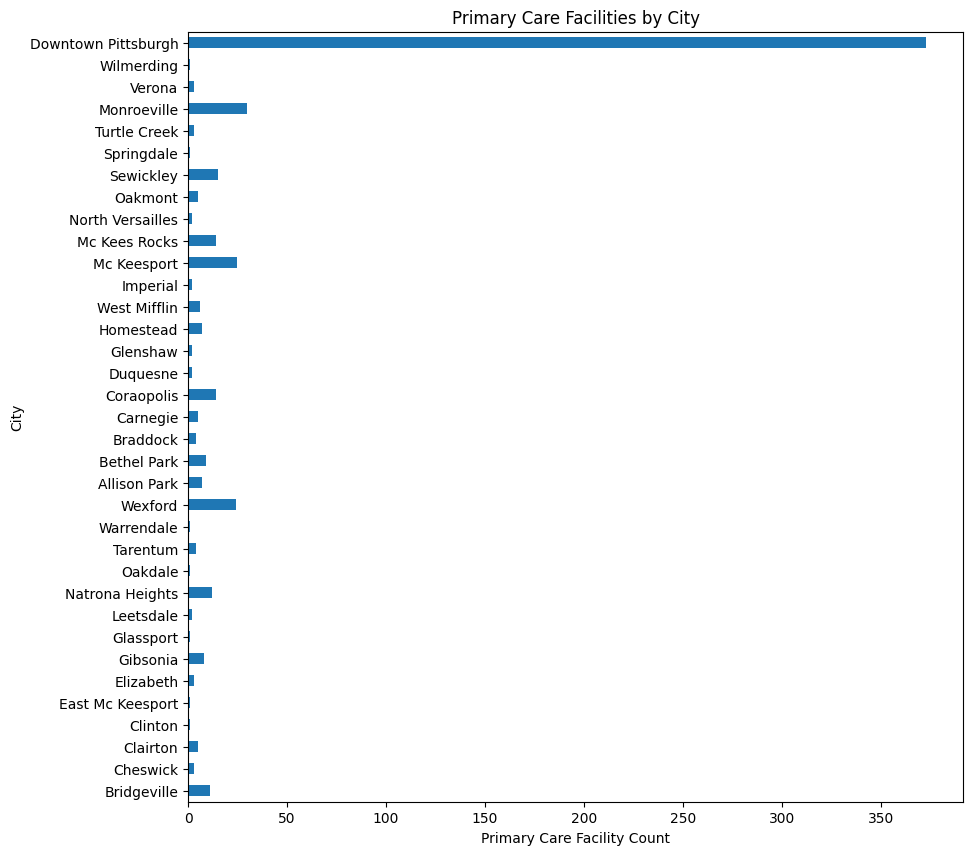

In [56]:
plt.figure(figsize=(10,10))
city_data['PCF'].plot.barh()

plt.title('Primary Care Facilities by City')
plt.xlabel("Primary Care Facility Count")

This isn't all too helpful, as the number of primary care facilities increases with population. It's much more efficient to look at a ratio of number of people per facility. This will give a much better indication as to "how much" care is accesible in a given neighborhood.

Text(0.5, 0, 'Population:Facility Ratio')

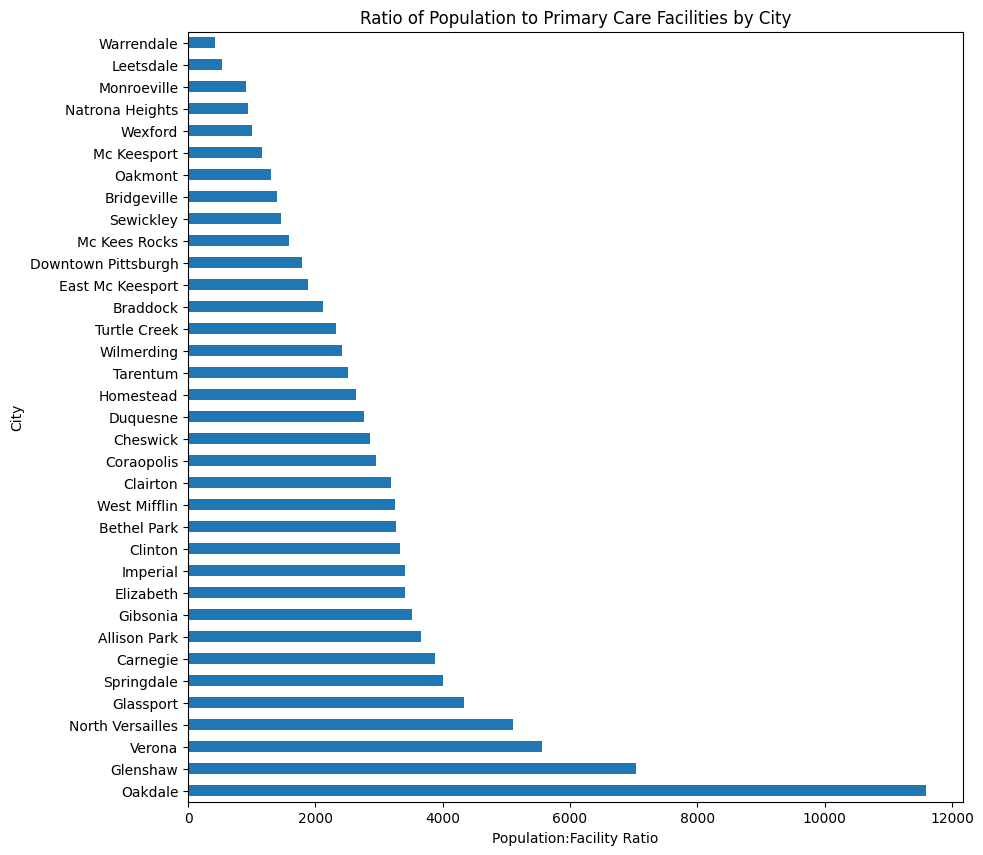

In [65]:
plt.figure(figsize=(10,10))
sorted_data = city_data.sort_values(by='Ratio', ascending=False)
sorted_data['Ratio'].plot.barh()

plt.title('Ratio of Population to Primary Care Facilities by City')
plt.xlabel("Population:Facility Ratio")

Now we see that cities like Warrendale, Leetsdale, Monroeville, Natrona Heights, and Wexford have ideal population to primary care facility ratios.

## Final Words on Primary Care Facilities

The most optimal way to judge the access to care is by looking at the population to primary care facility quantity ratio. This result is summarized in the table below, listing the ten best cities by this ratio in decending order. Purely byway of this ratio, the best neighborhood in Pittsburgh in terms of access to primary care is **Warrendale**. The town's low population may be offputting to some, as well as the fact that **there is only 1 primary care facility** in the town. Nonetheless, this town has the best ratio, and by this metric, it is the best town.

In [66]:
sorted_data = city_data.sort_values(by='Ratio')
sorted_data.head(10)

,Population,PCF,Ratio
City,,,
Warrendale,422,1,422
Leetsdale,1063,2,531
Monroeville,27541,30,918
Natrona Heights,11280,12,940
Wexford,23970,24,998
Mc Keesport,28875,25,1155
Oakmont,6504,5,1300
Bridgeville,15363,11,1396
Sewickley,21966,15,1464


<br>

# Conclusion

Our final conclusion was motivated first by a fact revealed by the walkability: the walkability of Downtown Pittsburgh is incredibly high (which is to be expected). However, as seen by the distribution of walkability ratios, when factoring out Downtown, all non-urban areas are, on average, as walkable as one another. This gave us a special liberty, as if Downtown Pittsburgh wasn't the clear and away favorite for our other two metrics, we could discard it but still use the knowledge from the walkability data to know that another neighborhood will almost certainly have not only a tolerable walkability, but a level of walkability that is identical to some other arbitrary choice in neighborhood.

With that in mind, we arrived at our conclusion for, in total, the "best city" in the area. And that city was...

<font size="10">
    <b>Homestead</b>
</font>
    
Our methodolody was... quite simple. Upon a cursory glance of the other two datasets, crime data and primary care data, both Homestead and Carnegie were among the best for both metrics, but Homestead outperformed Carnegie for primary care metric (Homestead was 12 places ahead of Carnegie among the best cities in the primary care facility metric), and Homestead was simply the immediate city following Carnegie in crime data. Because of the near identical ranking for crime data, the tiebreaker was the more substantial difference in ranking for Homestead. It should be noted that Downtown Pittsburgh performed somewhat poorly in both the primary care facility metric as well as in the crime data metric, meaning, as mentioned in the discussion of walkability, it was not considered for the *totally* best city.

**A Note About Data Science**
The best data scientists are the ones who give the best results in the most "efficient" manner... (said someone at some point, probably). But in all seriousness, a very important skill of data science is making economical decisions about how to handle data and the subsequent computations. The "look at two lists and see that values overlap" may seem like an unprofessional method, but, it is arguable the *most* professional because it requires the *least* amoung of effort. Getting the job done to a sufficient degree while saving resources (time, computaitonal resources, etc.) is precisely what the data scientist is tasked with, and that is exactly what we've done: identify the clear best city using a coherent methodolofy while minimizing the resourses required to arrive at that conclusion.

***A Mock Methodology***

For due diligence's sake, we pose a hypothetical methodology (that we were actually going to employ until we realized that the answer was right in front of us). We were going to give a linear weight (between 0 and 1 exclusive) for each of our three metrics, and then, for each city, give that city a score between 0 and 100 (inclusive) determined by that linear weight. In other words, we'd describe a function that takes in, for each city, the values of each metric, and spits out a single value (a score) depending on those linear weights and how well the city performed based on our metrics, to determine what the best city is. While this might be the more scientific approach, we found an approach that is more in the spirit of actual data science. 